# Personalización de Campaña de Marketing: Segmentación de Clientes

El objetivo de este análisis es realizar una **segmentación de clientes** para personalizar una campaña de e-mail dirigida a **10,000 clientes**. Utilizaremos el algoritmo **K-Nearest Neighbors (KNN)** para agrupar a los clientes en **4 o 5 segmentos**, basándonos en características demográficas clave y en su **probabilidad de compra**.

## Contexto

Siguiendo la sugerencia del equipo de marketing, liderado por **Erin**, se acordó que la segmentación se basaría en datos demográficos como:

- **Edad**
- **Sexo**
- **Ingresos**
- **Probabilidad de compra**

Este enfoque permitirá crear perfiles específicos que servirán para personalizar las creatividades y mensajes de la campaña de e-mail, mejorando la efectividad de la comunicación y maximizando las tasas de conversión.

## Objetivo

Crear segmentos de clientes bien definidos, de modo que las **4 o 5 creatividades** de la campaña se alineen con los perfiles identificados. Esto permitirá que la campaña sea más relevante y efectiva para cada grupo, lo que podría aumentar significativamente las probabilidades de éxito de la campaña de venta de **tarjetas de crédito**.



In [4]:
import numpy as np 
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.cluster import KMeans

In [5]:
# Leer dataframe con los datos de los 10000 clientes.

df_seleccionados = pd.read_parquet(r'C:\Users\Usuario\Desktop\Nuclio\TFM_Nuclio\easy_money_project\Tarea_3_Recomendación\top_customers_no_credit_card.parquet')

In [6]:
df_seleccionados

,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,num_products_contracts,p_cuenta_bancaria,cuentas_sum,p_inversion,inversion_sum,p_financiacion,financiacion_sum,profit_cuentas,profit_inversion,profit_financiacion,country_id,gender,mes_partition,mes_nombre_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,sale_credit_card,sale_short_term_deposit,sale_loans,sale_mortgage,sale_funds,sale_securities,sale_long_term_deposit,sale_em_account_pp,sale_payroll,sale_pension_plan,sale_payroll_account,sale_emc_account,sale_debit_card,sale_em_account_p,sale_em_acount,probability
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1200307,2019-05-28,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,5,1,3,1,1,1,1,30,40,60,ES,V,5,May,Adultos mayores,"937,306.320",Madrid,2016-10-15,KFC,1,02 - PARTICULARES,2-3 años,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1.000
330599,2019-05-28,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,7,1,4,1,2,1,1,40,80,60,ES,H,5,May,Adultos mayores,"314,597.850",Madrid,2016-11-21,KFA,1,02 - PARTICULARES,2-3 años,0,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1.000
1136531,2019-05-28,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,5,1,3,1,1,1,1,30,40,60,ES,H,5,May,Adultos jóvenes,"236,739.840",Madrid,2016-06-06,KAT,1,02 - PARTICULARES,Más de 3 años,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1.000
1138692,2019-05-28,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,5,1,3,1,1,1,1,30,40,60,ES,V,5,May,Adultos,"265,487.490",Madrid,2016-06-27,KFC,1,02 - PARTICULARES,2-3 años,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1.000
1258071,2019-05-28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,60,ES,V,5,May,Adultos,"714,033.300",Madrid,2017-09-17,KFA,1,02 - PARTICULARES,1-2 años,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108774,2019-05-28,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,4,1,3,1,1,0,0,30,40,0,ES,H,5,May,Adultos jóvenes,"154,672.140",Sevilla,2015-12-03,KHE,1,02 - PARTICULARES,Más de 3 años,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0.701
1298291,2019-05-28,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,6,1,5,1,1,0,0,50,40,0,ES,V,5,May,Adultos,"129,719.160",Cádiz,2017-08-22,KFC,1,02 - PARTICULARES,1-2 años,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0.701
1209693,2019-05-28,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,4,1,3,1,1,0,0,30,40,0,ES,H,5,May,Adultos jóvenes,"66,520.140",Asturias,2016-10-28,KFC,1,03 - UNIVERSITARIO,2-3 años,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0.701


In [7]:
# Listar las columnas a eliminar
columns_to_drop = [
    'pk_partition',
    'short_term_deposit',
    'loans',
    'mortgage',
    'funds',
    'securities',
    'long_term_deposit',
    'em_account_pp',
    'credit_card',
    'payroll',
    'pension_plan',
    'payroll_account',
    'emc_account',
    'debit_card',
    'em_account_p',
    'em_acount',
    'num_products_contracts',
    'p_cuenta_bancaria',
    'cuentas_sum',
    'p_inversion',
    'inversion_sum',
    'p_financiacion',
    'financiacion_sum',
    'profit_cuentas',
    'profit_inversion',
    'profit_financiacion',
    'country_id',
    'mes_nombre_partition',
    'sale_credit_card',
    'sale_short_term_deposit',
    'sale_loans',
    'sale_mortgage',
    'sale_funds',
    'sale_securities',
    'sale_long_term_deposit',
    'sale_em_account_pp',
    'sale_payroll',
    'sale_pension_plan',
    'sale_payroll_account',
    'sale_emc_account',
    'sale_debit_card',
    'sale_em_account_p',
    'sale_em_acount'
]

# Eliminar las columnas del DataFrame
df_seleccionados.drop(columns=columns_to_drop, axis=1, inplace=True)

In [8]:
df_seleccionados

,gender,mes_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,probability
pk_cid,,,,,,,,,,,
1200307,V,5,Adultos mayores,"937,306.320",Madrid,2016-10-15,KFC,1,02 - PARTICULARES,2-3 años,1.000
330599,H,5,Adultos mayores,"314,597.850",Madrid,2016-11-21,KFA,1,02 - PARTICULARES,2-3 años,1.000
1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,2016-06-06,KAT,1,02 - PARTICULARES,Más de 3 años,1.000
1138692,V,5,Adultos,"265,487.490",Madrid,2016-06-27,KFC,1,02 - PARTICULARES,2-3 años,1.000
1258071,V,5,Adultos,"714,033.300",Madrid,2017-09-17,KFA,1,02 - PARTICULARES,1-2 años,1.000
...,...,...,...,...,...,...,...,...,...,...,...
1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,2015-12-03,KHE,1,02 - PARTICULARES,Más de 3 años,0.701
1298291,V,5,Adultos,"129,719.160",Cádiz,2017-08-22,KFC,1,02 - PARTICULARES,1-2 años,0.701
1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,2016-10-28,KFC,1,03 - UNIVERSITARIO,2-3 años,0.701


In [9]:
df_seleccionados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1200307 to 1165902
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   gender                10000 non-null  object        
 1   mes_partition         10000 non-null  int32         
 2   grupo_edad            10000 non-null  object        
 3   median_salary         10000 non-null  float64       
 4   region_code           10000 non-null  object        
 5   entry_date            10000 non-null  datetime64[ns]
 6   entry_channel         10000 non-null  object        
 7   active_customer       10000 non-null  int32         
 8   segment               10000 non-null  category      
 9   categoria_antiguedad  10000 non-null  category      
 10  probability           10000 non-null  float32       
dtypes: category(2), datetime64[ns](1), float32(1), float64(1), int32(2), object(4)
memory usage: 684.1+ KB


In [12]:
df_seleccionados = df_seleccionados.reset_index()
df_seleccionados.rename(columns={'index': 'pk_cid'}, inplace=True)

In [14]:
df_seleccionados.duplicated().sum()

0

In [22]:
df_seleccionados

,pk_cid,gender,mes_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,probability
0,1200307,V,5,Adultos mayores,"937,306.320",Madrid,2016-10-15,KFC,1,02 - PARTICULARES,2-3 años,1.000
1,330599,H,5,Adultos mayores,"314,597.850",Madrid,2016-11-21,KFA,1,02 - PARTICULARES,2-3 años,1.000
2,1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,2016-06-06,KAT,1,02 - PARTICULARES,Más de 3 años,1.000
3,1138692,V,5,Adultos,"265,487.490",Madrid,2016-06-27,KFC,1,02 - PARTICULARES,2-3 años,1.000
4,1258071,V,5,Adultos,"714,033.300",Madrid,2017-09-17,KFA,1,02 - PARTICULARES,1-2 años,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,2015-12-03,KHE,1,02 - PARTICULARES,Más de 3 años,0.701
9996,1298291,V,5,Adultos,"129,719.160",Cádiz,2017-08-22,KFC,1,02 - PARTICULARES,1-2 años,0.701
9997,1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,2016-10-28,KFC,1,03 - UNIVERSITARIO,2-3 años,0.701
9998,1120992,H,5,Adultos,"143,527.110",Madrid,2016-10-15,KAT,0,02 - PARTICULARES,2-3 años,0.701


In [15]:
# sociodemografico
sdg_df_cleaned = pd.read_parquet('https://easy-money-project-bucket.s3.eu-west-3.amazonaws.com/sociodemographic_df_adrian.parquet')


In [25]:
sdg_df_cleaned

,pk_cid,pk_partition,country_id,region_code,gender,age,salary,mes_partition,mes_nombre_partition,grupo_edad
0,15891,2018-07-28,ES,Madrid,H,59,"102,377.400",7,July,Adultos mayores
1,15891,2018-08-28,ES,Madrid,H,59,"132,384.450",8,August,Adultos mayores
2,16063,2018-11-28,ES,Madrid,H,62,"102,377.400",11,November,Adultos mayores
3,16063,2018-12-28,ES,Madrid,H,62,"132,384.450",12,December,Adultos mayores
4,16063,2019-01-28,ES,Madrid,H,62,"132,384.450",1,January,Adultos mayores
...,...,...,...,...,...,...,...,...,...,...
5962919,1553685,2019-05-28,ES,Ciudad Real,V,52,"114,633.765",5,May,Adultos
5962920,1553686,2019-05-28,ES,Sevilla,H,30,"85,787.220",5,May,Adultos jóvenes
5962921,1553687,2019-05-28,ES,Madrid,V,21,"143,419.770",5,May,Jóvenes
5962922,1553688,2019-05-28,ES,Cantabria,H,43,"114,633.765",5,May,Adultos


In [26]:
sdg_last = sdg_df_cleaned[sdg_df_cleaned["pk_partition"] == "2019-05-28"]

In [29]:
df_joined = df_seleccionados.merge(sdg_last[['pk_cid', 'age']], on='pk_cid', how='left')


In [30]:
df_joined

,pk_cid,gender,mes_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,probability,age
0,1200307,V,5,Adultos mayores,"937,306.320",Madrid,2016-10-15,KFC,1,02 - PARTICULARES,2-3 años,1.000,55
1,330599,H,5,Adultos mayores,"314,597.850",Madrid,2016-11-21,KFA,1,02 - PARTICULARES,2-3 años,1.000,60
2,1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,2016-06-06,KAT,1,02 - PARTICULARES,Más de 3 años,1.000,38
3,1138692,V,5,Adultos,"265,487.490",Madrid,2016-06-27,KFC,1,02 - PARTICULARES,2-3 años,1.000,51
4,1258071,V,5,Adultos,"714,033.300",Madrid,2017-09-17,KFA,1,02 - PARTICULARES,1-2 años,1.000,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,2015-12-03,KHE,1,02 - PARTICULARES,Más de 3 años,0.701,34
9996,1298291,V,5,Adultos,"129,719.160",Cádiz,2017-08-22,KFC,1,02 - PARTICULARES,1-2 años,0.701,51
9997,1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,2016-10-28,KFC,1,03 - UNIVERSITARIO,2-3 años,0.701,30
9998,1120992,H,5,Adultos,"143,527.110",Madrid,2016-10-15,KAT,0,02 - PARTICULARES,2-3 años,0.701,40


Ya tenemos el dataframe con todos los datos de los 10.000 clientes para la segmentacion 

In [31]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pk_cid                10000 non-null  int64         
 1   gender                10000 non-null  object        
 2   mes_partition         10000 non-null  int32         
 3   grupo_edad            10000 non-null  object        
 4   median_salary         10000 non-null  float64       
 5   region_code           10000 non-null  object        
 6   entry_date            10000 non-null  datetime64[ns]
 7   entry_channel         10000 non-null  object        
 8   active_customer       10000 non-null  int32         
 9   segment               10000 non-null  category      
 10  categoria_antiguedad  10000 non-null  category      
 11  probability           10000 non-null  float32       
 12  age                   10000 non-null  int64         
dtypes: category(2), d

In [32]:
# Contar el número de filas duplicadas
num_duplicated = df_joined.duplicated().sum()

# Mostrar el número de filas duplicadas
print(f"Número de filas duplicadas: {num_duplicated}")

Número de filas duplicadas: 0


In [33]:
# Contar el número de filas duplicadas
num_null = df_joined.isna().sum().sum()

# Mostrar el número de filas duplicadas
print(f"Número de valores nulos: {num_null}")

Número de valores nulos: 0


Despues de comprobar que el dataset no tiene ni valores nulos ni duplicados, seleccionaremos las variables que utilizaremos para la segmentacion.

## Limpieza de atributos


Los valores de fechas serán eliminados y la variable de categoría "antigüedad" también será eliminada. Sin embargo, esta variable puede ser interesante, por lo que calcularemos una nueva que represente los meses de antigüedad para poder usarla en la segmentación.

In [34]:
# Fecha fija para la comparación
fecha_referencia = pd.to_datetime('2019-05-28')

# Calcular los meses de antigüedad
df_joined['meses_antiguedad'] = ((fecha_referencia - df_joined['entry_date']).dt.days // 30).astype(int)

In [35]:
df_joined

,pk_cid,gender,mes_partition,grupo_edad,median_salary,region_code,entry_date,entry_channel,active_customer,segment,categoria_antiguedad,probability,age,meses_antiguedad
0,1200307,V,5,Adultos mayores,"937,306.320",Madrid,2016-10-15,KFC,1,02 - PARTICULARES,2-3 años,1.000,55,31
1,330599,H,5,Adultos mayores,"314,597.850",Madrid,2016-11-21,KFA,1,02 - PARTICULARES,2-3 años,1.000,60,30
2,1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,2016-06-06,KAT,1,02 - PARTICULARES,Más de 3 años,1.000,38,36
3,1138692,V,5,Adultos,"265,487.490",Madrid,2016-06-27,KFC,1,02 - PARTICULARES,2-3 años,1.000,51,35
4,1258071,V,5,Adultos,"714,033.300",Madrid,2017-09-17,KFA,1,02 - PARTICULARES,1-2 años,1.000,53,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,2015-12-03,KHE,1,02 - PARTICULARES,Más de 3 años,0.701,34,42
9996,1298291,V,5,Adultos,"129,719.160",Cádiz,2017-08-22,KFC,1,02 - PARTICULARES,1-2 años,0.701,51,21
9997,1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,2016-10-28,KFC,1,03 - UNIVERSITARIO,2-3 años,0.701,30,31
9998,1120992,H,5,Adultos,"143,527.110",Madrid,2016-10-15,KAT,0,02 - PARTICULARES,2-3 años,0.701,40,31


In [37]:
# Eliminar columnas de fechas
df_joined.drop('categoria_antiguedad', axis=1, inplace=True)
df_joined.drop('entry_date', axis=1, inplace=True)

In [38]:
df_joined

,pk_cid,gender,mes_partition,grupo_edad,median_salary,region_code,entry_channel,active_customer,segment,probability,age,meses_antiguedad
0,1200307,V,5,Adultos mayores,"937,306.320",Madrid,KFC,1,02 - PARTICULARES,1.000,55,31
1,330599,H,5,Adultos mayores,"314,597.850",Madrid,KFA,1,02 - PARTICULARES,1.000,60,30
2,1136531,H,5,Adultos jóvenes,"236,739.840",Madrid,KAT,1,02 - PARTICULARES,1.000,38,36
3,1138692,V,5,Adultos,"265,487.490",Madrid,KFC,1,02 - PARTICULARES,1.000,51,35
4,1258071,V,5,Adultos,"714,033.300",Madrid,KFA,1,02 - PARTICULARES,1.000,53,20
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1108774,H,5,Adultos jóvenes,"154,672.140",Sevilla,KHE,1,02 - PARTICULARES,0.701,34,42
9996,1298291,V,5,Adultos,"129,719.160",Cádiz,KFC,1,02 - PARTICULARES,0.701,51,21
9997,1209693,H,5,Adultos jóvenes,"66,520.140",Asturias,KFC,1,03 - UNIVERSITARIO,0.701,30,31
9998,1120992,H,5,Adultos,"143,527.110",Madrid,KAT,0,02 - PARTICULARES,0.701,40,31


## Meses de antigüedad

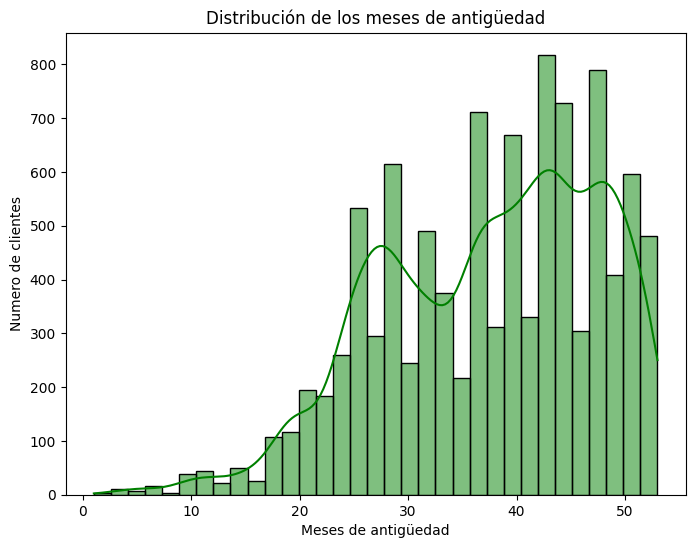

In [39]:
# Grafico meses antiguedad
plt.figure(figsize=(8, 6))
sns.histplot(data=df_joined, x='meses_antiguedad', kde=True, color='green', stat='count', palette='Spectral')
plt.title('Distribución de los meses de antigüedad')
plt.xlabel('Meses de antigüedad')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=0)
plt.show()

## Probabilidad de compra

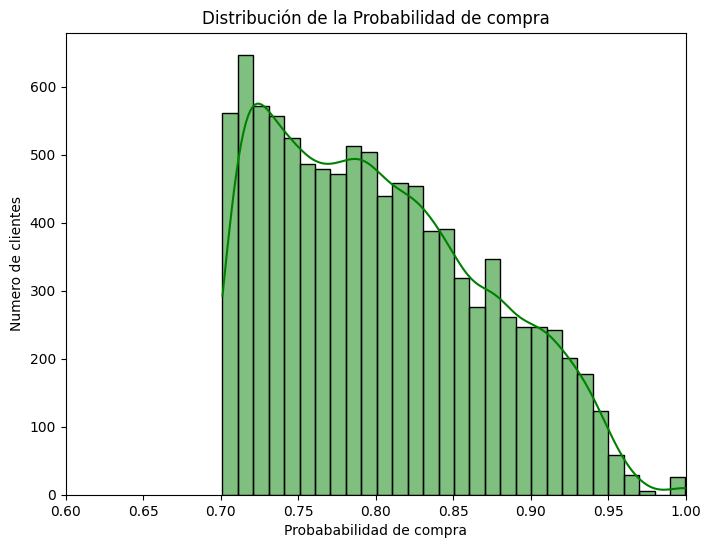

In [42]:
# Supongamos que 'variable_numerica' es el nombre de tu columna numérica que va de 0 a 1
plt.figure(figsize=(8, 6))
sns.histplot(data=df_joined, x='probability', bins=30, color = "green" ,kde=True,stat='count', palette='Spectral')
plt.title('Distribución de la Probabilidad de compra')
plt.xlabel('Probababilidad de compra')
plt.ylabel('Numero de clientes')
plt.xlim(0.6, 1)
plt.xticks(rotation=0)
plt.show()

Añadir la variable prob_compra a la segmentación tiene sentido porque proporciona una estimación clara de la probabilidad de que un cliente realice una compra. Con valores que van de 0.7 a 1, esta variable nos permite identificar distintos niveles de intención de compra. Al segmentar en función de esta probabilidad, podemos personalizar los mensajes de marketing, enfocándonos en aquellos clientes más propensos a realizar una compra y diferenciando estrategias para aquellos con probabilidades más bajas, lo que optimiza la efectividad de la campaña.

## Edad

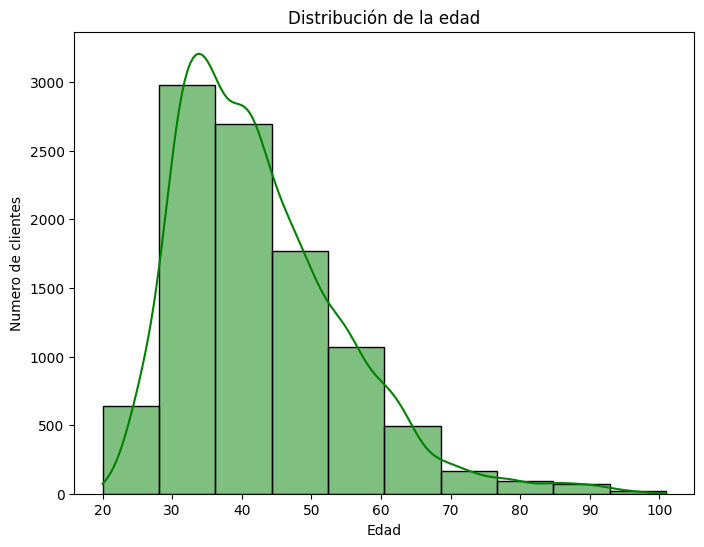

In [43]:
# Grafico edad
plt.figure(figsize=(8, 6))
sns.histplot(data=df_joined, x='age', bins=10, kde=True, color='green', stat='count', palette='Spectral')
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=0)
plt.show()

Añadir la variable edad a la segmentación es fundamental porque las necesidades, preferencias y comportamientos de compra suelen variar significativamente en función de la etapa de la vida en la que se encuentra un cliente. La edad influye en muchos aspectos, desde los productos o servicios que podrían interesar hasta la forma en que un cliente prefiere recibir información. Al segmentar por edad, podemos personalizar las campañas para que sean más relevantes y atractivas para cada grupo demográfico, aumentando así la efectividad de la estrategia de marketing.

Además, optar por la variable numérica en lugar de agrupar por rangos de edad permite una mayor precisión en el análisis. Esta precisión es especialmente crucial para el modelo KNN, que se basa en la distancia entre puntos de datos. Al utilizar la edad como un valor continuo, mejoramos la capacidad del modelo para identificar patrones y similitudes, lo que resulta en recomendaciones y segmentaciones más efectivas.

In [44]:
df_joined.drop('grupo_edad', axis=1, inplace=True)

## Median_salary

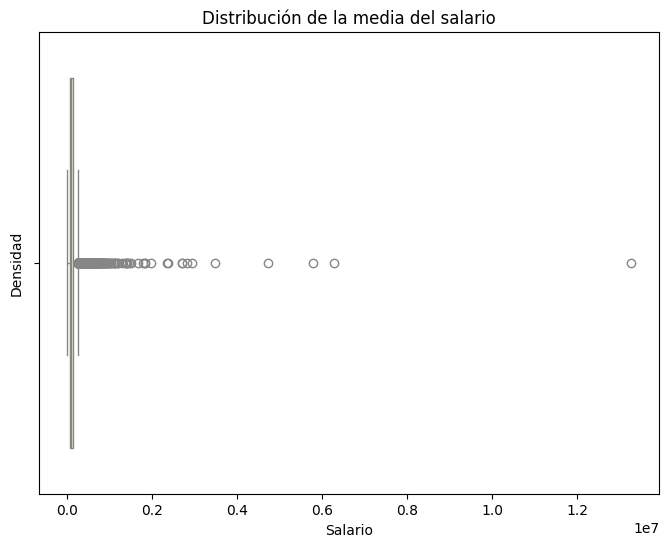

In [45]:
# Grafica salario
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_joined, x='median_salary', color='green',  palette='Spectral')
plt.title('Distribución de la media del salario')
plt.xlabel('Salario')
plt.ylabel('Densidad')
plt.xticks(rotation=0)
plt.show()

Vamos a tratar los outliers en la variable median_salary porque los valores extremadamente altos pueden distorsionar el rendimiento del modelo. Estos outliers pueden sesgar la segmentación, haciendo que el modelo se enfoque en patrones que no son representativos del comportamiento general de los clientes. Al limitar estos valores, reducimos su impacto negativo y mejoramos la capacidad del modelo para identificar grupos más consistentes y útiles para la campaña de marketing. 

In [46]:
# Calcular los percentiles 90% y 95%
percentile_90 = df_joined['median_salary'].quantile(0.90)
percentile_95 = df_joined['median_salary'].quantile(0.95)

# Imprimir los resultados
print(f"Percentil 90: {percentile_90}")
print(f"Percentil 95: {percentile_95}")

Percentil 90: 213372.744
Percentil 95: 293345.46749999985



Limitar el valor de median_salary en el percentil 95% es una técnica común para tratar outliers sin eliminar datos por completo. Al limitar el salario en el percentil 95%, mantenemos la mayoría de los datos representativos y reducimos la influencia de valores atípicos. Esta técnica permite que el modelo se concentre en la distribución típica de los salarios y mejora la capacidad de generalización en la segmentación de clientes.

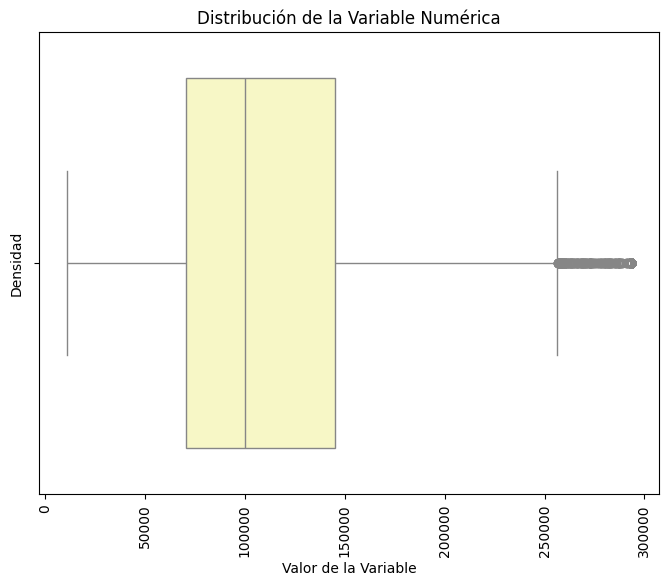

In [47]:
# Limitar el median_salary al percentil 95
df_joined['median_salary'] = df_joined['median_salary'].apply(lambda x: min(x, percentile_95))

# Supongamos que 'variable_numerica' es el nombre de tu columna numérica que va de 0 a 1
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_joined, x='median_salary', color='green',palette="Spectral")
plt.title('Distribución de la Variable Numérica')
plt.xlabel('Valor de la Variable')
plt.ylabel('Densidad')
plt.xticks(rotation=90)
plt.show()

## Numero de productos contratados

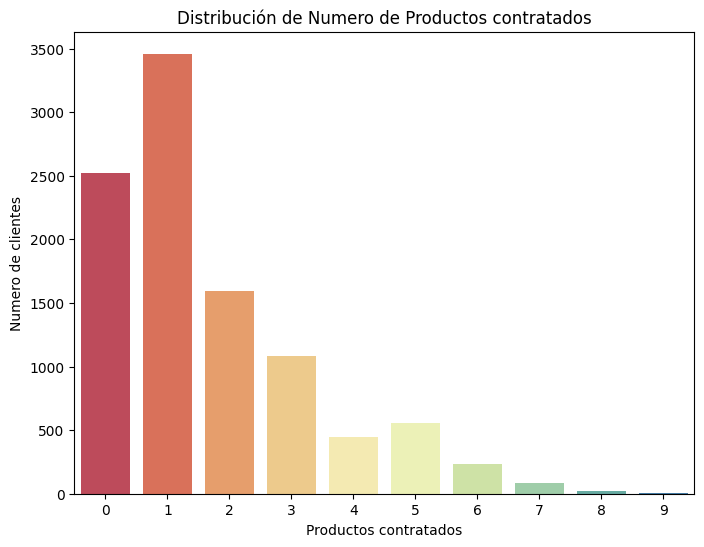

In [110]:
'''# Obtener los valores únicos de 'num_products_contracts'

plt.figure(figsize=(8, 6))
sns.countplot(data=df_joined, x='num_products_contracts', palette='Spectral')
plt.title('Distribución de Numero de Productos contratados')
plt.xlabel('Productos contratados')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=0)
plt.show()'''

In [111]:
'''df_joined['num_products_contracts'].value_counts(normalize = True) * 100'''

num_products_contracts
1   34.600
0   25.240
2   15.930
3   10.830
5    5.540
4    4.480
6    2.330
7    0.840
8    0.190
9    0.020
Name: proportion, dtype: float64


Se añade la variable num_products_contracts a la segmentación debido a su capacidad para proporcionar información valiosa sobre el comportamiento de los clientes. Con una distribución que muestra una variedad de niveles de contratación (desde 0 hasta 9 productos), esta variable permite identificar patrones en la lealtad del cliente y la potencialidad de ventas adicionales. Además, la inclusión de esta variable facilita la personalización de ofertas y la segmentación de clientes en función de su compromiso con la empresa, lo que puede conducir a estrategias de marketing más efectivas y a un aumento en la retención de clientes.

## Gender

In [50]:
df_joined['gender'].value_counts(normalize = True) * 100

gender
V   65.190
H   34.810
Name: proportion, dtype: float64


Se incluye la variable gender en la segmentación debido a su distribución un poco desequilibrada, con un 65.19% de hombres (V) y un 34.81% de mujeres (H). Esta diversidad permite identificar diferencias significativas en el comportamiento y las preferencias de los clientes, lo que es fundamental para personalizar las estrategias de marketing y mejorar la efectividad de las campañas dirigidas a cada género.

## Mes_Partition

In [51]:
df_joined['mes_partition'].value_counts(normalize = True) * 100

mes_partition
5   100.000
Name: proportion, dtype: float64

Se eliminan las variables mes_partition y mes_nombre_partition debido a su distribución desbalanceada, donde una única categoría (mes 5) .

In [52]:
df_joined.drop('mes_partition', axis=1, inplace=True)

## Active_customer

In [53]:
df_joined['active_customer'].value_counts(normalize = True) * 100

active_customer
1   97.230
0    2.770
Name: proportion, dtype: float64

Se elimina esta variabel por no proporcionar demasiada informacion.

In [54]:
df_joined.drop('active_customer', axis = 1, inplace=True)

In [55]:
df_joined

,pk_cid,gender,median_salary,region_code,entry_channel,segment,probability,age,meses_antiguedad
0,1200307,V,"293,345.467",Madrid,KFC,02 - PARTICULARES,1.000,55,31
1,330599,H,"293,345.467",Madrid,KFA,02 - PARTICULARES,1.000,60,30
2,1136531,H,"236,739.840",Madrid,KAT,02 - PARTICULARES,1.000,38,36
3,1138692,V,"265,487.490",Madrid,KFC,02 - PARTICULARES,1.000,51,35
4,1258071,V,"293,345.467",Madrid,KFA,02 - PARTICULARES,1.000,53,20
...,...,...,...,...,...,...,...,...,...
9995,1108774,H,"154,672.140",Sevilla,KHE,02 - PARTICULARES,0.701,34,42
9996,1298291,V,"129,719.160",Cádiz,KFC,02 - PARTICULARES,0.701,51,21
9997,1209693,H,"66,520.140",Asturias,KFC,03 - UNIVERSITARIO,0.701,30,31
9998,1120992,H,"143,527.110",Madrid,KAT,02 - PARTICULARES,0.701,40,31


## Segment

In [56]:
df_joined['segment'].value_counts(normalize = True) * 100 

segment
02 - PARTICULARES    74.570
03 - UNIVERSITARIO   15.070
01 - TOP             10.360
Name: proportion, dtype: float64

## Region_code

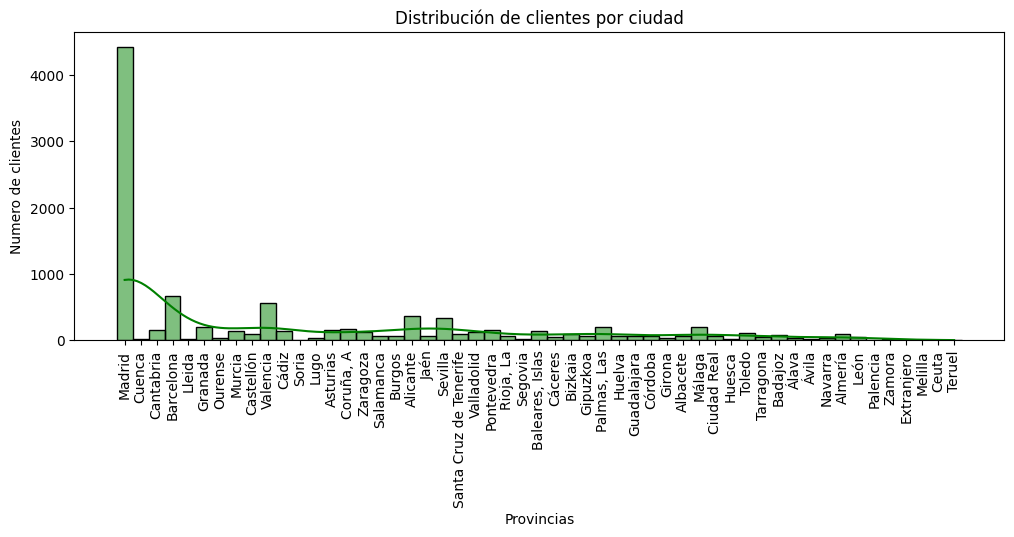

In [118]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df_joined, x='region_code', kde=True, color='green', palette='Spectral')
plt.title('Distribución de clientes por ciudad')
plt.xlabel('Provincias')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=90)
plt.show()

In [58]:
df_joined['region_code'].value_counts(normalize = True) * 100 

region_code
Madrid                   44.170
Barcelona                 6.620
Valencia                  5.610
Alicante                  3.660
Sevilla                   3.320
Málaga                    2.020
Granada                   2.010
Palmas, Las               2.010
Coruña, A                 1.750
Cantabria                 1.580
Pontevedra                1.490
Asturias                  1.490
Murcia                    1.440
Cádiz                     1.430
Baleares, Islas           1.420
Zaragoza                  1.320
Valladolid                1.250
Toledo                    1.170
Castellón                 1.030
Bizkaia                   1.020
Santa Cruz de Tenerife    0.990
Almería                   0.930
Badajoz                   0.750
Burgos                    0.720
Jaén                      0.710
Salamanca                 0.710
Gipuzkoa                  0.640
Guadalajara               0.630
Huelva                    0.620
Ciudad Real               0.610
Córdoba                   0.

Voy a sustituir cada provincia por su número de habitantes para calcular la media de habitantes en cada cluster, lo que me brindará una idea del tamaño de las ciudades de mis clientes. Aunque no podré identificar la región específica de cada segmento, esta información me ayudará a diferenciar entre clientes de ciudades grandes y pequeñas.

Para llevar a cabo este enfoque, recogeré los datos de población del INE del año 2019 y realizaré las sustituciones necesarias.


In [59]:

# Población total de España
poblacion_total = 47026208

# Calcular la media de población por provincia
media_poblacion = poblacion_total / 52

# Diccionario que relaciona las provincias con su población
poblacion_dict = {
    'Madrid': 6663394,
    'Asturias': 1022800,
    'Palmas, Las': 1120406,
    'Barcelona': 5664579,
    'Valencia': 2565124,
    'Coruña, A': 1119596,
    'Sevilla': 1942389,
    'Alicante': 1858683,
    'Zaragoza': 964693,
    'Pontevedra': 942665,
    'Murcia': 1493898,
    'Cádiz': 1240155,
    'Valladolid': 519546,
    'Málaga': 1661785,
    'Salamanca': 330119,
    'Cantabria': 581078,
    'Bizkaia': 1152651,
    'Ávila': 157640,
    'Cáceres': 394151,
    'Toledo': 694844,
    'Burgos': 356958,
    'Albacete': 388167,
    'Baleares, Islas': 1149460,
    'Córdoba': 782979,
    'Granada': 914678,
    'Rioja, La': 316798,
    'Badajoz': 673559,
    'Castellón': 579962,
    'Lugo': 329587,
    'Ciudad Real': 495761,
    'Ourense': 307651,
    'León': 460001,
    'Huelva': 521870,
    'Jaén': 633564,
    'Tarragona': 804664,
    'Santa Cruz de Tenerife': 1032983,
    'Navarra': 654214,
    'Zamora': 172539,
    'Álava': 331549,
    'Almería': 716820,
    'Gipuzkoa': 723576,
    'Palencia': 160980,
    'Guadalajara': 257762,
    'Segovia': 153129,
    'Girona': 771044,
    'Cuenca': 196329,
    'Huesca': 220461,
    'Lleida': 434930,
    'Extranjero': media_poblacion,  # Media de la población para "Extranjero"
    'Soria': 88636,
    'Teruel': 134137,
    'Melilla': 86487,
    'Ceuta': 84777
}

# Reemplazar los nombres de provincias en df_joined por la población correspondiente
df_joined['region_code'] = df_joined['region_code'].replace(poblacion_dict)

# Cambiar el tipo de la columna a int
df_joined['region_code'] = df_joined['region_code'].astype(int)

# Verifica los cambios
df_joined

,pk_cid,gender,median_salary,region_code,entry_channel,segment,probability,age,meses_antiguedad
0,1200307,V,"293,345.467",6663394,KFC,02 - PARTICULARES,1.000,55,31
1,330599,H,"293,345.467",6663394,KFA,02 - PARTICULARES,1.000,60,30
2,1136531,H,"236,739.840",6663394,KAT,02 - PARTICULARES,1.000,38,36
3,1138692,V,"265,487.490",6663394,KFC,02 - PARTICULARES,1.000,51,35
4,1258071,V,"293,345.467",6663394,KFA,02 - PARTICULARES,1.000,53,20
...,...,...,...,...,...,...,...,...,...
9995,1108774,H,"154,672.140",1942389,KHE,02 - PARTICULARES,0.701,34,42
9996,1298291,V,"129,719.160",1240155,KFC,02 - PARTICULARES,0.701,51,21
9997,1209693,H,"66,520.140",1022800,KFC,03 - UNIVERSITARIO,0.701,30,31
9998,1120992,H,"143,527.110",6663394,KAT,02 - PARTICULARES,0.701,40,31


In [60]:
# Cambiar el nombre de la columna
df_joined.rename(columns={'region_code': 'pob_provincia'}, inplace=True)

La columna entry_channel se eliminará del DataFrame debido a la falta de información sobre su significado y contexto. Sin una comprensión clara de lo que representa, es difícil evaluar su relevancia y utilidad en el análisis

In [61]:
df_joined.drop('entry_channel', axis=1, inplace=True)

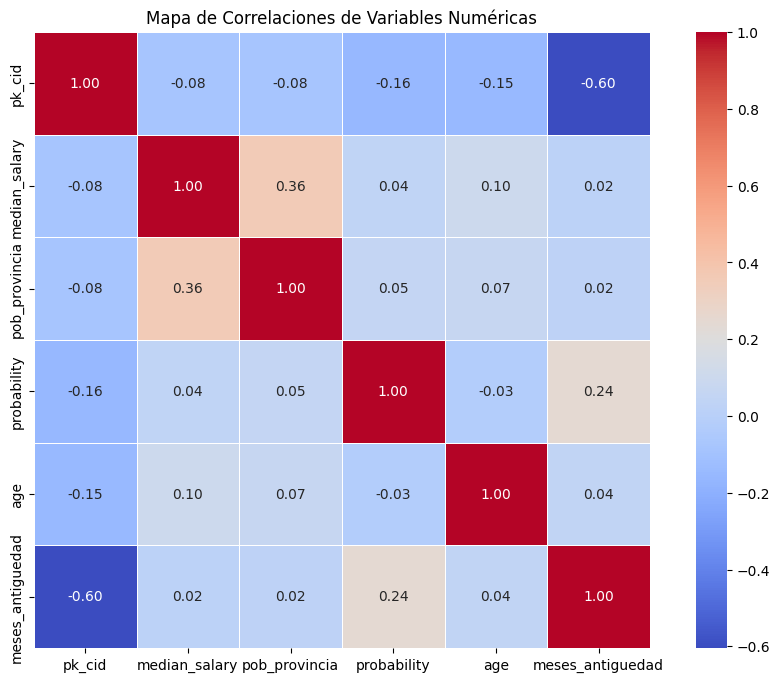

In [62]:
# Convertir columnas int32 a int64
for col in df_joined.select_dtypes(include=['int32']).columns:
    df_joined[col] = df_joined[col].astype('int64')

# Convertir columnas float32 a float64
for col in df_joined.select_dtypes(include=['float32']).columns:
    df_joined[col] = df_joined[col].astype('float64')

# Filtrar solo las columnas numéricas
numerical_df = df_joined.select_dtypes(include=['float64', 'int64'])

# Calculamos la matriz de correlación
correlation_matrix = numerical_df.corr()

# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Creamos el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=0.5)

# Título del gráfico
plt.title('Mapa de Correlaciones de Variables Numéricas')

# Mostramos el gráfico
plt.show()

# Encoding

In [63]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pk_cid            10000 non-null  int64   
 1   gender            10000 non-null  object  
 2   median_salary     10000 non-null  float64 
 3   pob_provincia     10000 non-null  int64   
 4   segment           10000 non-null  category
 5   probability       10000 non-null  float64 
 6   age               10000 non-null  int64   
 7   meses_antiguedad  10000 non-null  int64   
dtypes: category(1), float64(2), int64(4), object(1)
memory usage: 556.9+ KB


In [64]:
df_completo = df_joined.copy()

In [125]:
df_completo.drop('meses_antiguedad', axis=1 , inplace=True)
df_completo.drop('probability', axis=1 , inplace=True)

KeyError: "['meses_antiguedad'] not found in axis"

In [126]:
df_joined = df_completo

In [127]:
# Cambiar 'gender' a 1 si es 'V' y 0 si es 'H'
df_joined['genero_v'] = df_joined['gender'].map({'V': 1, 'H': 0})

# Eliminar la columna original 'gender'
df_joined.drop(columns=['gender'], inplace=True)

KeyError: 'gender'

In [128]:
df_joined

,median_salary,pob_provincia,segment,probability,age,genero_v
pk_cid,,,,,,
1200307,293345,6663394,02 - PARTICULARES,1.000,55,1
330599,293345,6663394,02 - PARTICULARES,1.000,60,0
1136531,236740,6663394,02 - PARTICULARES,1.000,38,0
1138692,265487,6663394,02 - PARTICULARES,1.000,51,1
1258071,293345,6663394,02 - PARTICULARES,1.000,53,1
...,...,...,...,...,...,...
1108774,154672,1942389,02 - PARTICULARES,0.701,34,0
1298291,129719,1240155,02 - PARTICULARES,0.701,51,1
1209693,66520,1022800,03 - UNIVERSITARIO,0.701,30,0


In [129]:
# Redondear los valores de median_salary y cambiar a tipo int64
df_joined['median_salary'] = df_joined['median_salary'].round().astype('int64')

In [130]:
df_joined

,median_salary,pob_provincia,segment,probability,age,genero_v
pk_cid,,,,,,
1200307,293345,6663394,02 - PARTICULARES,1.000,55,1
330599,293345,6663394,02 - PARTICULARES,1.000,60,0
1136531,236740,6663394,02 - PARTICULARES,1.000,38,0
1138692,265487,6663394,02 - PARTICULARES,1.000,51,1
1258071,293345,6663394,02 - PARTICULARES,1.000,53,1
...,...,...,...,...,...,...
1108774,154672,1942389,02 - PARTICULARES,0.701,34,0
1298291,129719,1240155,02 - PARTICULARES,0.701,51,1
1209693,66520,1022800,03 - UNIVERSITARIO,0.701,30,0


In [131]:
# Aplicar get_dummies a las columnas 'recomendacion' y 'segment'
df_joined = pd.get_dummies(df_joined, columns=['segment'], dtype=int)

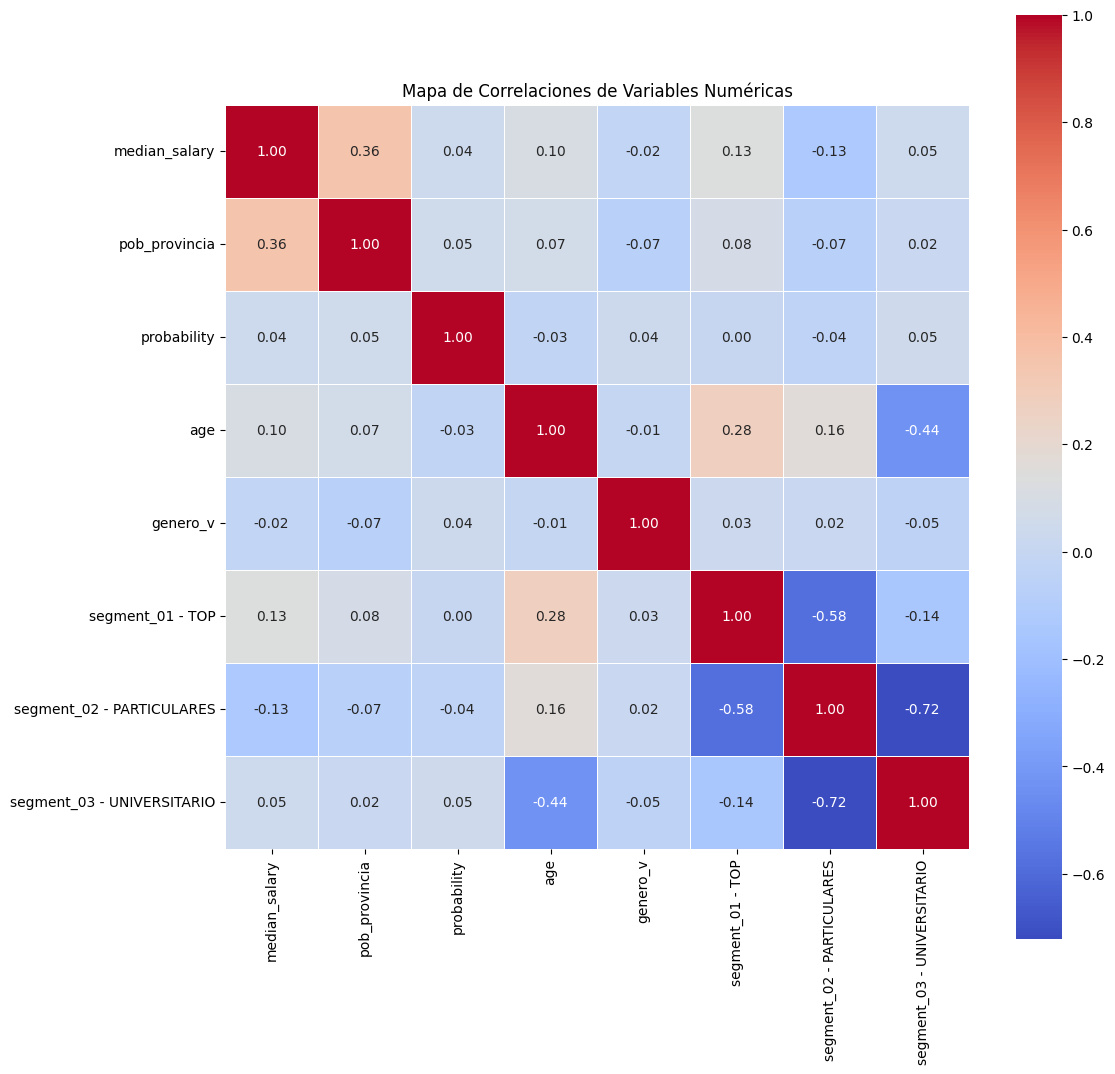

In [132]:
# Calculamos la matriz de correlación
correlation_matrix = df_joined.corr()

# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 12))

# Creamos el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=0.5)

# Título del gráfico
plt.title('Mapa de Correlaciones de Variables Numéricas')

# Mostramos el gráfico
plt.show()

In [133]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1200307 to 1165902
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   median_salary               10000 non-null  int64  
 1   pob_provincia               10000 non-null  int64  
 2   probability                 10000 non-null  float64
 3   age                         10000 non-null  int64  
 4   genero_v                    10000 non-null  int64  
 5   segment_01 - TOP            10000 non-null  int32  
 6   segment_02 - PARTICULARES   10000 non-null  int32  
 7   segment_03 - UNIVERSITARIO  10000 non-null  int32  
dtypes: float64(1), int32(3), int64(4)
memory usage: 585.9 KB


In [134]:
# Crear el escalador
scaler = RobustScaler()

# Aplicar el escalador a las columnas numéricas
df_joined_scaled = df_joined.copy()
df_joined_scaled[df_joined_scaled.columns] = scaler.fit_transform(df_joined_scaled)

# Mostrar el DataFrame escalado
df_joined_scaled

,median_salary,pob_provincia,probability,age,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO
pk_cid,,,,,,,,
1200307,2.599,0.177,1.898,1.000,0.000,0.000,0.000,0.000
330599,2.599,0.177,1.898,1.333,-1.000,0.000,0.000,0.000
1136531,1.838,0.177,1.897,-0.133,-1.000,0.000,0.000,0.000
1138692,2.225,0.177,1.897,0.733,0.000,0.000,0.000,0.000
1258071,2.599,0.177,1.897,0.867,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...
1108774,0.736,-0.661,-0.862,-0.400,-1.000,0.000,0.000,0.000
1298291,0.400,-0.786,-0.862,0.733,0.000,0.000,0.000,0.000
1209693,-0.449,-0.824,-0.862,-0.667,-1.000,0.000,-1.000,1.000


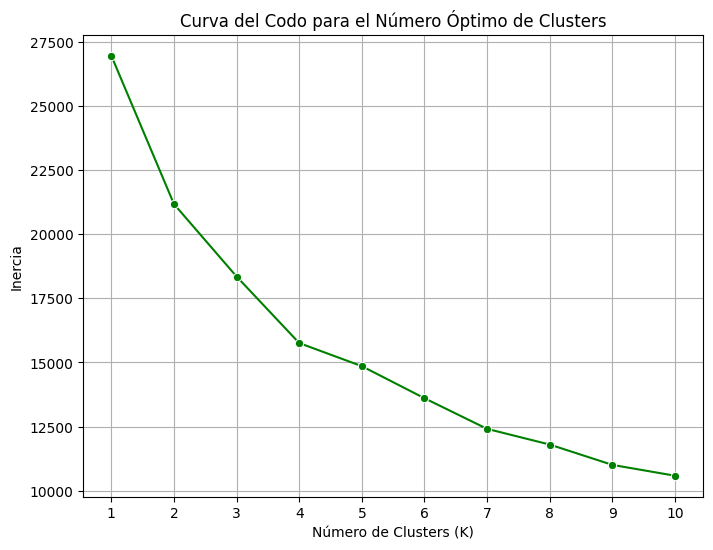

In [135]:
# Definir el rango de clusters a evaluar
range_n_clusters = range(1, 11)
inertia = []

# Calcular la inercia para cada número de clusters
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_joined_scaled)
    inertia.append(kmeans.inertia_)

# Dibujar la curva del codo
plt.figure(figsize=(8, 6))
sns.lineplot(x=range_n_clusters, y=inertia, marker='o',color = 'green',palette='Spectral')
plt.title('Curva del Codo para el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

In [136]:
cluster_model_4 = KMeans(n_clusters = 4, random_state=42)
cluster_model_5 = KMeans(n_clusters = 5, random_state=42)


df_joined_scaled['cluster_4'] = cluster_model_4.fit_predict(df_joined_scaled)
df_joined_scaled['cluster_5'] = cluster_model_5.fit_predict(df_joined_scaled)


print(df_joined_scaled['cluster_4'].value_counts())
print(df_joined_scaled['cluster_5'].value_counts())


cluster_4
0    5029
3    1994
1    1555
2    1422
Name: count, dtype: int64
cluster_5
0    4986
1    1994
2    1422
3     810
4     788
Name: count, dtype: int64


In [137]:

df_joined_scaled_4 = df_joined_scaled.drop('cluster_5', axis=1)

In [138]:
df_joined_scaled_5 = df_joined_scaled.drop('cluster_4', axis=1)

In [139]:
df_joined_scaled_4


,median_salary,pob_provincia,probability,age,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,cluster_4
pk_cid,,,,,,,,,
1200307,2.599,0.177,1.898,1.000,0.000,0.000,0.000,0.000,1
330599,2.599,0.177,1.898,1.333,-1.000,0.000,0.000,0.000,1
1136531,1.838,0.177,1.897,-0.133,-1.000,0.000,0.000,0.000,1
1138692,2.225,0.177,1.897,0.733,0.000,0.000,0.000,0.000,1
1258071,2.599,0.177,1.897,0.867,0.000,0.000,0.000,0.000,1
...,...,...,...,...,...,...,...,...,...
1108774,0.736,-0.661,-0.862,-0.400,-1.000,0.000,0.000,0.000,0
1298291,0.400,-0.786,-0.862,0.733,0.000,0.000,0.000,0.000,3
1209693,-0.449,-0.824,-0.862,-0.667,-1.000,0.000,-1.000,1.000,2


In [140]:
df_joined_scaled_5

,median_salary,pob_provincia,probability,age,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,cluster_5
pk_cid,,,,,,,,,
1200307,2.599,0.177,1.898,1.000,0.000,0.000,0.000,0.000,4
330599,2.599,0.177,1.898,1.333,-1.000,0.000,0.000,0.000,4
1136531,1.838,0.177,1.897,-0.133,-1.000,0.000,0.000,0.000,3
1138692,2.225,0.177,1.897,0.733,0.000,0.000,0.000,0.000,4
1258071,2.599,0.177,1.897,0.867,0.000,0.000,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...
1108774,0.736,-0.661,-0.862,-0.400,-1.000,0.000,0.000,0.000,0
1298291,0.400,-0.786,-0.862,0.733,0.000,0.000,0.000,0.000,1
1209693,-0.449,-0.824,-0.862,-0.667,-1.000,0.000,-1.000,1.000,2


In [141]:
cols = list(df_joined_scaled_5.columns)
cols.remove("cluster_5")
# Calcular las medias para cada cluster
pt = pd.pivot_table(df_joined_scaled_5, index='cluster_5', values=cols, aggfunc='mean')

# Calcular la cantidad de elementos en cada cluster
add = pd.pivot_table(df_joined_scaled_5, index='cluster_5', values='median_salary', aggfunc='count')
pt['count'] = add

# Añadir 'count' a la lista de columnas para la visualización final
cols.append('count')

# Mostrar la tabla con estilos y gradientes de color
pt[cols].style.background_gradient(cmap='coolwarm')

,median_salary,pob_provincia,probability,age,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,count
cluster_5,,,,,,,,,
0,-0.193801,-0.428048,0.053380,-0.058898,-0.332732,0.030886,-0.030886,0.000000,4986
1,0.146272,-0.269346,0.025357,1.316750,-0.335005,0.264794,-0.266299,0.001505,1994
2,0.074630,-0.320443,0.149444,-0.631974,-0.411392,0.065401,-1.000000,0.934599,1422
3,1.244824,0.006103,0.221099,0.080741,-0.332099,0.123457,-0.160494,0.037037,810
4,2.408161,-0.010529,0.099481,0.392047,-0.380711,0.204315,-0.388325,0.184010,788


In [142]:
cols = list(df_joined_scaled_4.columns)
cols.remove("cluster_4")
# Calcular las medias para cada cluster
pt = pd.pivot_table(df_joined_scaled_4, index='cluster_4', values=cols, aggfunc='mean')

# Calcular la cantidad de elementos en cada cluster
add = pd.pivot_table(df_joined_scaled_4, index='cluster_4', values='median_salary', aggfunc='count')
pt['count'] = add

# Añadir 'count' a la lista de columnas para la visualización final
cols.append('count')

# Mostrar la tabla con estilos y gradientes de color
pt[cols].style.background_gradient(cmap='coolwarm')

,median_salary,pob_provincia,probability,age,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,count
cluster_4,,,,,,,,,
0,-0.185841,-0.423215,0.059734,-0.059217,-0.332671,0.030622,-0.030622,0.000000,5029
1,1.848388,-0.005952,0.143558,0.243387,-0.356913,0.167846,-0.280386,0.112540,1555
2,0.074630,-0.320443,0.149444,-0.631974,-0.411392,0.065401,-1.000000,0.934599,1422
3,0.146272,-0.269346,0.025357,1.316750,-0.335005,0.264794,-0.266299,0.001505,1994


In [143]:
df_joined_scaled_5

,median_salary,pob_provincia,probability,age,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,cluster_5
pk_cid,,,,,,,,,
1200307,2.599,0.177,1.898,1.000,0.000,0.000,0.000,0.000,4
330599,2.599,0.177,1.898,1.333,-1.000,0.000,0.000,0.000,4
1136531,1.838,0.177,1.897,-0.133,-1.000,0.000,0.000,0.000,3
1138692,2.225,0.177,1.897,0.733,0.000,0.000,0.000,0.000,4
1258071,2.599,0.177,1.897,0.867,0.000,0.000,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...
1108774,0.736,-0.661,-0.862,-0.400,-1.000,0.000,0.000,0.000,0
1298291,0.400,-0.786,-0.862,0.733,0.000,0.000,0.000,0.000,1
1209693,-0.449,-0.824,-0.862,-0.667,-1.000,0.000,-1.000,1.000,2


In [144]:
# Guardar la columna de clusters
clusters_5 = df_joined_scaled_5['cluster_5']

# Eliminar el resto de las columnas escaladas
df_joined_scaled_5.drop(columns=df_joined_scaled_5.columns, inplace=True)

# Revertir a los datos originales (sin escalar), salvo por la columna de clusters
df_joined_scaled_5 = df_joined.copy()

# Añadir la columna de clusters al DataFrame original
df_joined_scaled_5['cluster_5'] = clusters_5

In [145]:
df_joined_scaled_5

,median_salary,pob_provincia,probability,age,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,cluster_5
pk_cid,,,,,,,,,
1200307,293345,6663394,1.000,55,1,0,1,0,4
330599,293345,6663394,1.000,60,0,0,1,0,4
1136531,236740,6663394,1.000,38,0,0,1,0,3
1138692,265487,6663394,1.000,51,1,0,1,0,4
1258071,293345,6663394,1.000,53,1,0,1,0,4
...,...,...,...,...,...,...,...,...,...
1108774,154672,1942389,0.701,34,0,0,1,0,0
1298291,129719,1240155,0.701,51,1,0,1,0,1
1209693,66520,1022800,0.701,30,0,0,0,1,2


In [146]:
# Calcular las medias de todas las columnas agrupadas por el cluster
cluster_means = df_joined_scaled_5.groupby('cluster_5').mean()

# Mostrar las medias
cluster_means

,median_salary,pob_provincia,probability,age,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO
cluster_5,,,,,,,,
0,"85,508.555","3,254,490.354",0.800,39.117,0.667,0.031,0.969,0.000
1,"110,815.543","4,148,050.550",0.797,59.751,0.665,0.265,0.734,0.002
2,"105,484.199","3,860,354.848",0.811,30.520,0.589,0.065,0.000,0.935
3,"192,565.610","5,698,941.643",0.818,41.211,0.668,0.123,0.840,0.037
4,"279,136.836","5,605,296.198",0.805,45.881,0.619,0.204,0.612,0.184


In [147]:
# Establecer la columna pk_cid como índice
df_completo.set_index('pk_cid', inplace=True)

KeyError: "None of ['pk_cid'] are in the columns"

In [89]:
df_full_5 = pd.concat([df_joined_scaled_5, df_completo], axis=1)
df_full_5 = df_full_5.loc[:, ~df_full_5.columns.duplicated()]


In [91]:
df_full_5.drop("gender", axis=1,inplace=True)
df_full_5.drop("segment", axis=1,inplace=True)

In [92]:
df_full_5

,median_salary,pob_provincia,probability,age,meses_antiguedad,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,cluster_5
pk_cid,,,,,,,,,,
1200307,293345,6663394,1.000,55,31,1,0,1,0,3
330599,293345,6663394,1.000,60,30,0,0,1,0,3
1136531,236740,6663394,1.000,38,36,0,0,1,0,3
1138692,265487,6663394,1.000,51,35,1,0,1,0,3
1258071,293345,6663394,1.000,53,20,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...
1108774,154672,1942389,0.701,34,42,0,0,1,0,1
1298291,129719,1240155,0.701,51,21,1,0,1,0,1
1209693,66520,1022800,0.701,30,31,0,0,0,1,1


In [93]:
# Calcular las medias de todas las columnas agrupadas por el cluster
cluster_full_5 = df_full_5.groupby('cluster_5').mean()

# Mostrar las medias
cluster_full_5

,median_salary,pob_provincia,probability,age,meses_antiguedad,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO
cluster_5,,,,,,,,,
0,"94,169.180","3,807,014.436",0.870,38.340,43.163,0.668,0.067,0.742,0.191
1,"78,656.390","1,162,778.628",0.759,37.486,33.035,0.655,0.033,0.800,0.168
2,"113,162.449","4,193,716.654",0.789,60.147,38.349,0.665,0.236,0.763,0.001
3,"239,985.250","5,627,122.462",0.806,42.385,37.735,0.631,0.162,0.646,0.192
4,"101,338.617","6,420,207.409",0.755,36.672,31.736,0.618,0.050,0.748,0.202


In [94]:
# Guardar la columna de clusters
clusters_4 = df_joined_scaled_4['cluster_4']

# Eliminar el resto de las columnas escaladas
df_joined_scaled_4.drop(columns=df_joined_scaled_4.columns, inplace=True)

# Revertir a los datos originales (sin escalar), salvo por la columna de clusters
df_joined_scaled_4 = df_joined.copy()

# Añadir la columna de clusters al DataFrame original
df_joined_scaled_4['cluster_4'] = clusters_4

In [95]:
# Calcular las medias de todas las columnas agrupadas por el cluster
cluster_means = df_joined_scaled_4.groupby('cluster_4').mean()

# Mostrar las medias
cluster_means

,median_salary,pob_provincia,probability,age,meses_antiguedad,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO
cluster_4,,,,,,,,,
0,"87,071.119","3,117,779.580",0.757,37.184,32.556,0.641,0.039,0.781,0.180
1,"239,942.964","5,627,804.669",0.806,42.378,37.720,0.631,0.162,0.646,0.192
2,"94,169.180","3,807,014.436",0.870,38.340,43.163,0.668,0.067,0.742,0.191
3,"113,162.449","4,193,716.654",0.789,60.147,38.349,0.665,0.236,0.763,0.001


In [97]:
df_completo

,gender,median_salary,pob_provincia,segment,probability,age,meses_antiguedad
pk_cid,,,,,,,
1200307,V,"293,345.467",6663394,02 - PARTICULARES,1.000,55,31
330599,H,"293,345.467",6663394,02 - PARTICULARES,1.000,60,30
1136531,H,"236,739.840",6663394,02 - PARTICULARES,1.000,38,36
1138692,V,"265,487.490",6663394,02 - PARTICULARES,1.000,51,35
1258071,V,"293,345.467",6663394,02 - PARTICULARES,1.000,53,20
...,...,...,...,...,...,...,...
1108774,H,"154,672.140",1942389,02 - PARTICULARES,0.701,34,42
1298291,V,"129,719.160",1240155,02 - PARTICULARES,0.701,51,21
1209693,H,"66,520.140",1022800,03 - UNIVERSITARIO,0.701,30,31


In [98]:
df_joined_scaled_4

,median_salary,pob_provincia,probability,age,meses_antiguedad,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,cluster_4
pk_cid,,,,,,,,,,
1200307,293345,6663394,1.000,55,31,1,0,1,0,1
330599,293345,6663394,1.000,60,30,0,0,1,0,1
1136531,236740,6663394,1.000,38,36,0,0,1,0,1
1138692,265487,6663394,1.000,51,35,1,0,1,0,1
1258071,293345,6663394,1.000,53,20,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1108774,154672,1942389,0.701,34,42,0,0,1,0,0
1298291,129719,1240155,0.701,51,21,1,0,1,0,0
1209693,66520,1022800,0.701,30,31,0,0,0,1,0


In [96]:

df_merged = df_joined_scaled_4.merge(df_completo, how="left", left_index=True, right_index=True)


AttributeError: 'DataFrame' object has no attribute 'concat'

In [157]:
# Establecer la columna pk_cid como índice
df_completo.set_index('pk_cid', inplace=True)

In [162]:
df_full_4 = pd.concat([df_joined_scaled_4, df_completo], axis=1)
df_full_4 = df_full_4.loc[:, ~df_full_4.columns.duplicated()]


In [ ]:
df_full_4.drop("cluster", axis=1,inplace=True)


In [167]:
df_full_4.drop("gender", axis=1,inplace=True)

In [168]:
df_full_4.drop("segment", axis=1,inplace=True)

In [170]:
# Aplicar get_dummies a las columnas 'recomendacion' y 'segment'
df_full_4 = pd.get_dummies(df_full_4, columns=['recomendacion'], dtype=int)

In [171]:
df_full_4

,beneficio,num_products_contracts,median_salary,pob_provincia,active_customer,age,meses_antiguedad,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,cluster_4,prob_compra,recomendacion_['credit_card'],recomendacion_['debit_card'],recomendacion_['em_acount'],recomendacion_['emc_account'],recomendacion_['funds'],recomendacion_['long_term_deposit'],recomendacion_['payroll'],recomendacion_['payroll_account'],recomendacion_['pension_plan'],recomendacion_['securities'],recomendacion_['short_term_deposit']
pk_cid,,,,,,,,,,,,,,,,,,,,,,,,
1119834,59.212,3,198676,6663394,1,63,40,1,1,0,0,3,0.987,1,0,0,0,0,0,0,0,0,0,0
88904,59.191,3,249174,6663394,1,48,46,0,1,0,0,3,0.987,1,0,0,0,0,0,0,0,0,0,0
1136278,59.100,4,95704,581078,1,53,36,1,1,0,0,0,0.985,1,0,0,0,0,0,0,0,0,0,0
1119669,59.095,5,82723,6663394,1,58,40,1,1,0,0,0,0.985,1,0,0,0,0,0,0,0,0,0,0
1109597,59.095,5,249174,6663394,1,59,42,1,1,0,0,3,0.985,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304214,9.553,5,62896,673559,1,37,20,1,0,1,0,0,0.955,0,0,0,1,0,0,0,0,0,0,0
1393343,9.553,2,88963,673559,1,38,13,1,0,1,0,1,0.955,0,0,0,0,0,0,0,1,0,0,0
1334243,9.553,3,63118,673559,1,41,19,1,0,1,0,0,0.955,0,1,0,0,0,0,0,0,0,0,0


In [172]:
# Calcular las medias de todas las columnas agrupadas por el cluster
cluster_full_4 = df_full_4.groupby('cluster_4').mean()

# Mostrar las medias
cluster_full_4

,beneficio,num_products_contracts,median_salary,pob_provincia,active_customer,age,meses_antiguedad,genero_v,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,prob_compra,recomendacion_['credit_card'],recomendacion_['debit_card'],recomendacion_['em_acount'],recomendacion_['emc_account'],recomendacion_['funds'],recomendacion_['long_term_deposit'],recomendacion_['payroll'],recomendacion_['payroll_account'],recomendacion_['pension_plan'],recomendacion_['securities'],recomendacion_['short_term_deposit']
cluster_4,,,,,,,,,,,,,,,,,,,,,,,
0,34.756,4.549,"103,212.376","3,560,266.035",1.000,38.066,29.234,0.594,0.313,0.351,0.336,0.898,0.393,0.011,0.160,0.033,0.007,0.146,0.004,0.064,0.165,0.018,0.000
1,10.537,1.033,"90,914.818","1,084,254.752",0.205,25.706,30.246,0.658,0.010,0.027,0.964,0.956,0.007,0.871,0.027,0.062,0.000,0.003,0.000,0.007,0.021,0.000,0.002
2,46.203,0.181,"93,837.009","2,247,357.488",0.151,28.483,17.272,0.571,0.009,0.377,0.614,0.800,0.942,0.021,0.001,0.005,0.000,0.021,0.000,0.001,0.008,0.000,0.001
3,11.807,2.167,"139,447.309","4,436,669.044",0.978,56.735,29.571,0.567,0.958,0.035,0.007,0.966,0.008,0.453,0.134,0.026,0.000,0.038,0.014,0.297,0.026,0.000,0.005
